# First Contentful Paint

## Imports

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Database Query

In [2]:
query = """
SELECT 
    page,
    rendering_type,
    json_extract(report, '$.cumulativeLayoutShift') AS cls
FROM metrics
WHERE report IS NOT NULL
    AND json_extract(report, '$.cumulativeLayoutShift') IS NOT NULL
    AND iteration_group = ?
"""

## Helper Functions - Plots

In [5]:
def plot_boxplot(iteration_group: int):
    conn = sqlite3.connect("../../metrics.db")
    df = pd.read_sql_query(query, conn, params=(iteration_group,))
    conn.close()

    if df.empty:
        print(f"No data found for iteration group {iteration_group}")
        return

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="page", y="cls", hue="rendering_type", data=df, legend=False)
    plt.title(f"Cumulative Layout Shift - {iteration_group} Iterationen")
    plt.xlabel("Page")
    plt.ylabel("Zeit in s")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def plot_table(iteration_group: int):
    conn = sqlite3.connect("../../metrics.db")
    df = pd.read_sql_query(query, conn, params=(iteration_group,))
    conn.close()
    
    summary = df.groupby("rendering_type")["cls"].agg(["mean", "std", "min", "max"]).round(2)
    display(summary)

## Visualization

### 10 Iterations

,mean,std,min,max
rendering_type,,,,
CSR,0.00,0.00,0.0,0.00
SSR,0.01,0.02,0.0,0.07


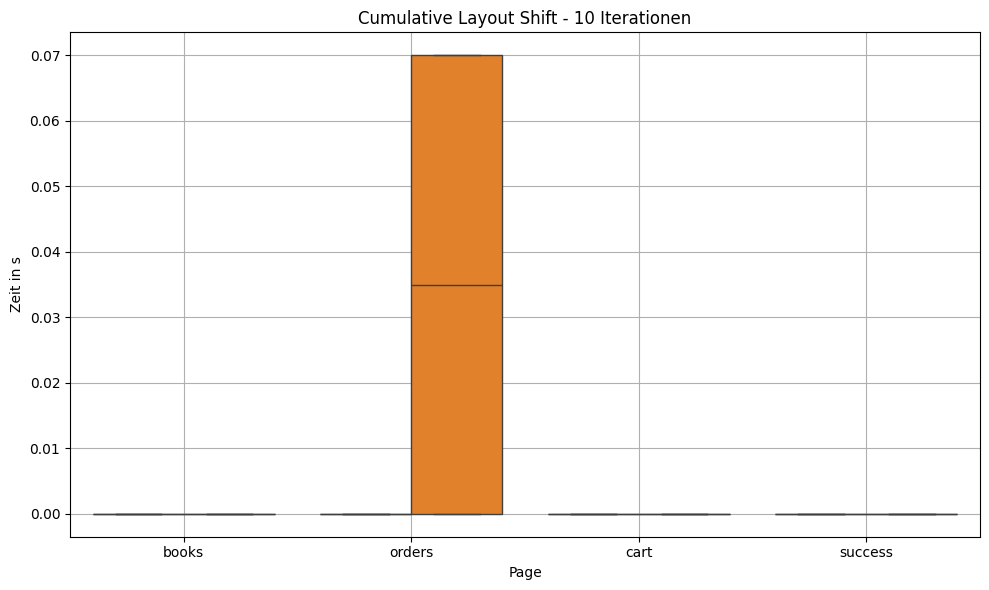

In [6]:
plot_table(10)
plot_boxplot(10)

### 100 Iterations

,mean,std,min,max
rendering_type,,,,
CSR,0.00,0.00,0.0,0.00
SSR,0.01,0.03,0.0,0.07


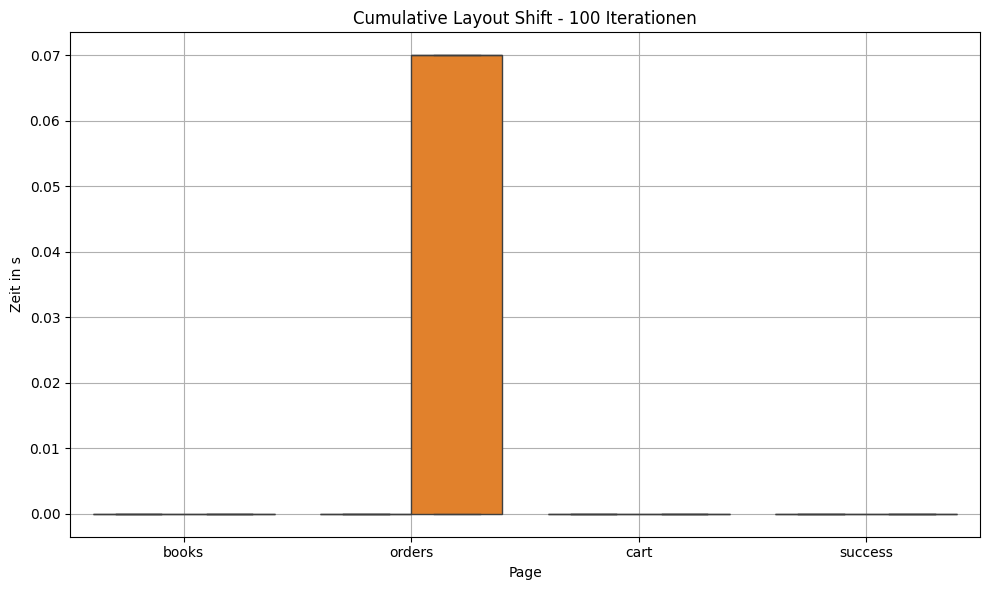

In [7]:
plot_table(100)
plot_boxplot(100)

### 1.000 Iterations

,mean,std,min,max
rendering_type,,,,
CSR,0.00,0.00,0.0,0.00
SSR,0.01,0.03,0.0,0.07


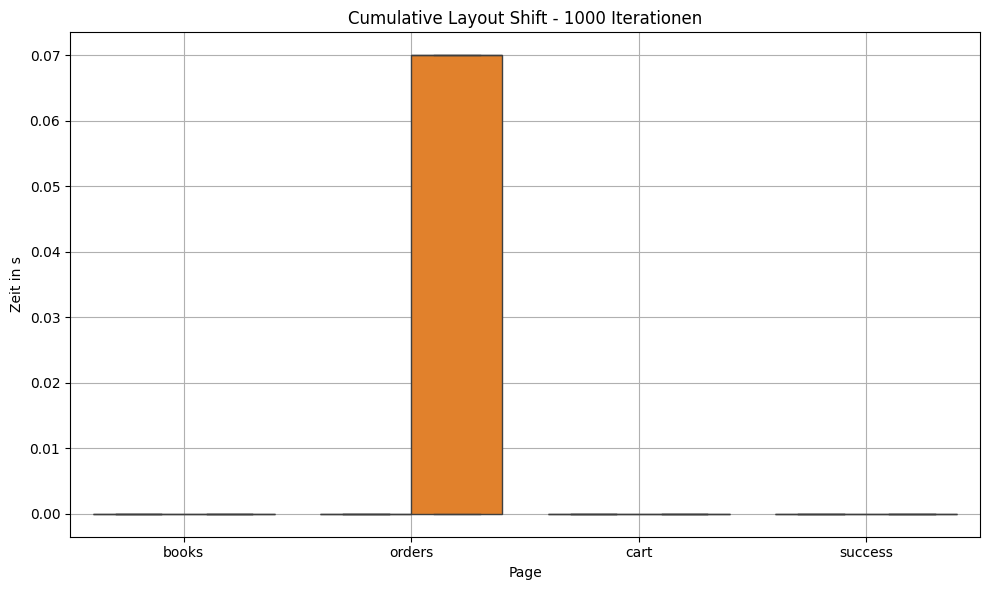

In [8]:
plot_table(1000)
plot_boxplot(1000)